# Muestreo

Vamos a analizar el efecto de aliasing. Para ello generamos señales con una suma de senos a distintas frecuencias. El teorema de nyquist dice que la máxima frecuencia posible a representar es la mitad de la frecuencia de muestreo, entonces generamos señales que tengan componentes que la superen para ver qué pasa.

In [2]:
import matplotlib.pyplot as plt
import generate_signals as gen
import numpy as np

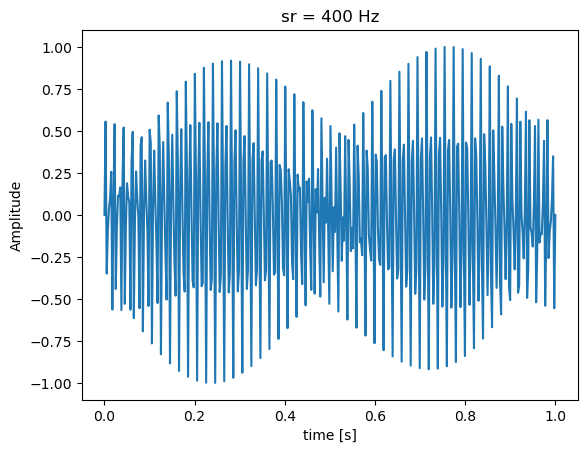

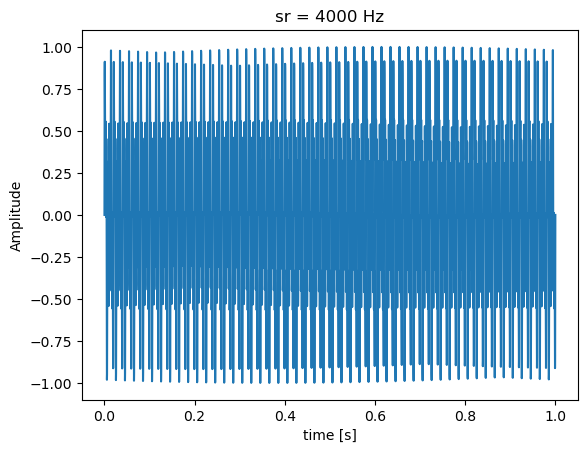

In [9]:
# Generate the signals
t_400, sine_sum_400 = gen.sine_sum([100,150,300,500], [1,1,1,1], 400)
t_4000, sine_sum_4000 = gen.sine_sum([100,150,300,500], [1,1,1,1], 4000)
t_alias, sine_sum_alias = gen.sine_sum([300,500], [1,1], 400) # 300 Hz, 500 Hz > 200 Hz (nyquist)

# Plot the signals
plt.plot(t_400, sine_sum_400)
plt.xlabel("time [s]")
plt.ylabel("Amplitude")
plt.title("sr = 400 Hz")
plt.show()
plt.plot(t_4000, sine_sum_4000)
plt.xlabel("time [s]")
plt.ylabel("Amplitude")
plt.title("sr = 4000 Hz")
plt.show()

In [4]:
def plot_fft_signal(signal, fs, title):
    """
    Plots the magnitude spectrum of a signal using FFT.
    
    Args:
        signal (ndarray): input signal.
        fs (float): sampling rate of the signal.

    Returns:
        None (displays a plot).
    """
    
    # Compute the FFT of the signal
    fft_raw = np.fft.fft(signal)
    
    # Keep only the positive frequencies
    fft = fft_raw[:len(fft_raw)//2]
    
    # Compute the magnitude of the FFT
    fft_mag = abs(fft) / len(fft)
    
    # Compute the corresponding frequencies
    freqs = np.linspace(0, fs/2, len(fft), endpoint=False)

    # Normalize the magnitude to the maximum value
    fft_mag_norm = fft_mag / np.max(abs(fft_mag))
    
    # Add a small epsilon to avoid numerical issues when computing the logarithm
    eps = np.finfo(float).eps
    
    # Convert the magnitude to decibels (dB)
    fft_mag_db = 20*np.log10(fft_mag_norm + eps)

    # Plot the magnitude spectrum in dB
    plt.figure(figsize=(15,5))
    plt.semilogx(freqs, fft_mag_db)
    ticks = [100, 150, 200, 300, 500]
    plt.title(title)
    plt.xticks([t for t in ticks], [f'{t}' for t in ticks])
    plt.xlim(80, 700)
    plt.ylim(-40, 5)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude [dB]')
    plt.grid()
    plt.show()

Las frecuencias de alias se calcula con el valor absoluto de la diferencia entre el múltiplo entero más cercano de la frecuencia de muestreo y las frecuencias de entrada que no cumplen con el teorema de nyquist.
En este caso, las frecuencias que no cumplen con el teorema de nyquist son las componentes de 300 y 500Hz. Por lo tanto aparecen un f<sub>300</sub> = |400Hz - 300Hz| = 100Hz; f<sub>500</sub> = |400Hz - 500Hz| = 100Hz

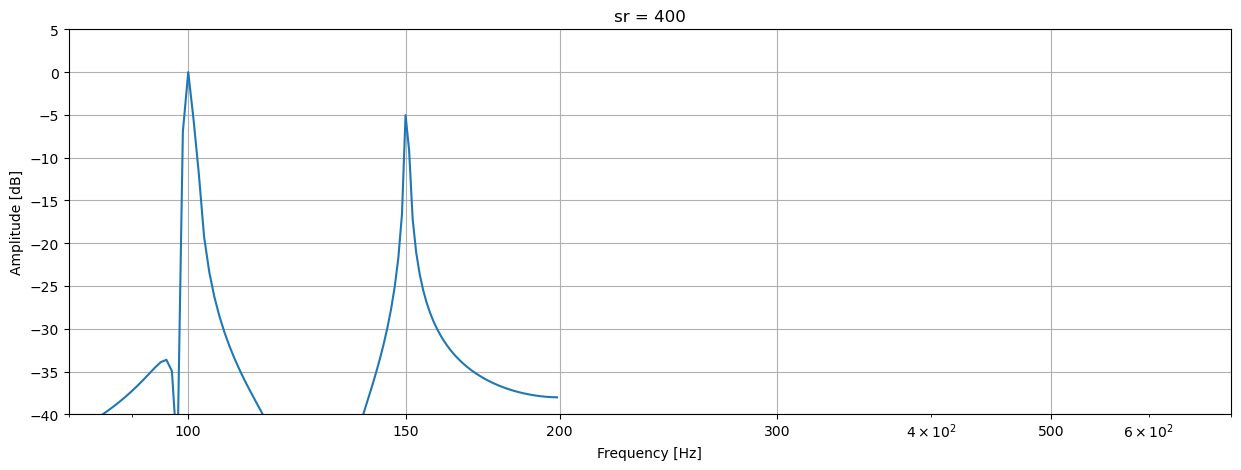

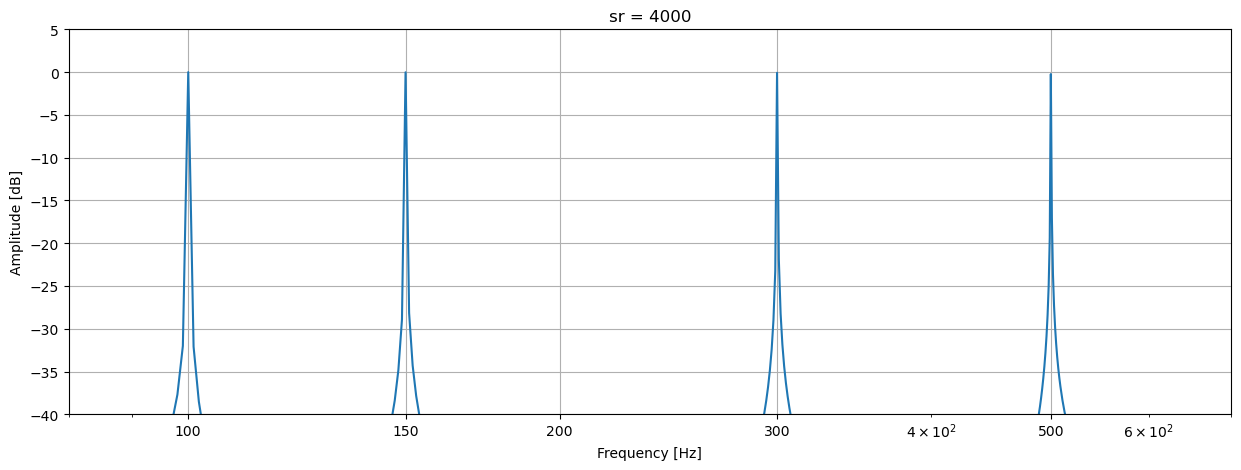

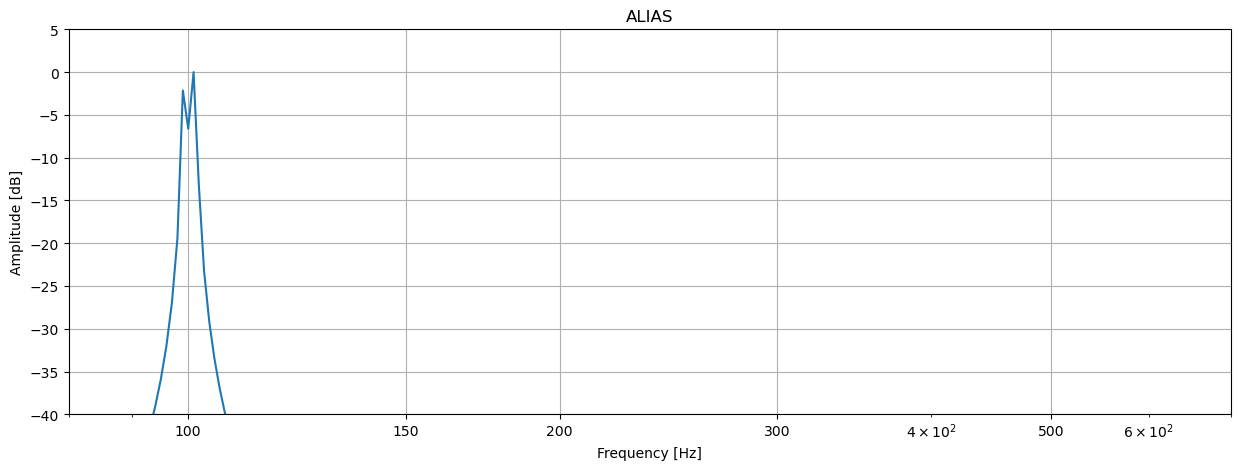

In [5]:
# FFT plot
plot_fft_signal(sine_sum_400, 400, "sr = 400")
plot_fft_signal(sine_sum_4000, 4000, "sr = 4000")
plot_fft_signal(sine_sum_alias, 400, "ALIAS")